This is a Bear Prediction classifier for black bear, grizzly bear and teddy bear. I have used Resnet-30 model for this classifier. This was inspired by Fastai course.

In [1]:
import torch
import torchvision
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


I have downloaded the pictures using this Javascript function. 

Javascript code to download images: 

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')))
;

Insert this code in console of the browser.



In [3]:
#Download pictures for the dataset from the csv files
#It is still incomplete and need to find a better way to download the pictures

import urllib
import requests

def download_pictures(filename):
  picture_file = open(filename,"r")
  data = picture_file.read()
  data = data.split('\n')
  j = 0
  for i in data:
    if i!='':
      urllib.request.urlretrieve(i,"/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb%d.jpg"%j)
      j+=1

download_pictures('/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/teddybears.csv')

In [ ]:
# Pictures have been downloaded

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [5]:
#loading images and converting into a numpy array

image_path = '/content/drive/My Drive/Colab Notebooks/Bear_Prediction' #main folder. the images are in the subfolder

def get_image(path):
  image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
  return image_files


tb = get_image('/content/drive/My Drive/Colab Notebooks/Bear_Prediction'+'/TeddyBears')
bb = get_image('/content/drive/My Drive/Colab Notebooks/Bear_Prediction'+'/BlackBears')
gb = get_image('/content/drive/My Drive/Colab Notebooks/Bear_Prediction'+'/GrizzlyBears')

print(tb)

['/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb0.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb1.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb10.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb11.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb12.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb13.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb14.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb15.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb16.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb17.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb18.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Prediction/TeddyBears/tb19.jpg', '/content/drive/My Drive/Colab Notebooks/Bear_Predict

In [6]:
from PIL import Image 

x = []
y = []
d = []

def image_resize(image_array):
  WIDTH = 220
  HEIGHT = 220
  for i in image_array:
    full_size_image = cv2.imread(i)
    x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

    if "tb"in i:
      y.append(1)
    elif "bb"in i:
      y.append(2)
    elif "gb" in i:
      y.append(3)
    else:
      y.append(0)

image_resize(tb)
image_resize(bb)
image_resize(gb)

In [7]:

d = []

def image_resize(image_array):
  WIDTH = 220
  HEIGHT = 220
  for i in image_array:
    full_size_image = cv2.imread(i)
    img = cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
    image = np.array(cv2.GaussianBlur(img, (5, 5), 0))
    final_img = np.rollaxis(image,2,0)

    if "tb"in i:
      label = 0
    elif "bb"in i:
      label = 1
    elif "gb" in i:
      label = 2
    else:
      label = 0

    d.append((final_img,label))

    

image_resize(tb)
image_resize(bb)
image_resize(gb)

In [8]:
d = tuple(d)


In [9]:
x1 = []
def noise_reduction(array):
  
  for i in range(len(array)):
    blur = cv2.GaussianBlur(array[i], (5, 5), 0)
    x1.append(blur)

noise_reduction(x)


In [10]:
x1 = np.array(x1)
x1 = np.rollaxis(x1,3,1)
df = pd.DataFrame()

print(x1.shape)
# df["labels"]=y

# df.images[0].shape
# plt.imshow(df.images[190])
# dataset = df.to_numpy()
# print(df.info())



(241, 3, 220, 220)


In [11]:
x = np.ones((640, 480, 3))
y = np.transpose(x, (2, 1, 0))


In [12]:
# # d = np.concatenate((np.array(x1),np.array(y).T),axis = 0)
# # print(d)
# print(np.array(y).shape)
# d = torch.utils.data.TensorDataset(np.array(x1))

In [13]:
def tup(df):
  return [tuple(x) for x in df.to_numpy()]

data = np.array(tup(df))
print(data.shape)

(0,)


In [14]:
#spliting of data into train and validation set
batch_size = 10
validation_split = .2
random_seed = 42

dataset_size = len(d)
indices = list(range(dataset_size))
# print(indices)
split = int(np.floor(validation_split * dataset_size))
# print(split)
shuffle_dataset = True
if shuffle_dataset:
  np.random.seed(random_seed)
  np.random.shuffle(indices)

# print(indices)

train_indices, val_indices = indices[split:], indices[:split]
# print(val_indices)

train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(d, batch_size=batch_size,sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(d, batch_size=batch_size,sampler=val_sampler)

print(train_sampler)

In [15]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.size(), labels.size()

(torch.Size([10, 3, 220, 220]), torch.Size([10]))

In [16]:

model = torchvision.models.resnet34(pretrained = True)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# print(model)

In [17]:
#initializing model

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

num = model.fc.in_features
set_parameter_requires_grad(model,True)
num_classes = 3
model.fc = torch.nn.Linear(num,num_classes)

In [18]:
#optimizing
#We will only update the last parameters. 

params_to_update = model.parameters()
print(params_to_update)
params_to_update = []
for name,param in model.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param)
    print("\t",name)

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

<generator object Module.parameters at 0x7f47855d5f68>
	 fc.weight
	 fc.bias


In [19]:
#CrossEntropyLoss() requires a 1-D tensor of class indices of the target (outputs in your case) but not one-hot vectors of the target.
criterion = torch.nn.CrossEntropyLoss() 

In [20]:
#training
print("Training...\n")
num_of_epochs = 20
running_loss_list = []
for epoch in range(num_of_epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    # print(labels)


    optimizer_ft.zero_grad()

    outputs = model(inputs.float())
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer_ft.step()

    running_loss+=loss.item()

    print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss))
    running_loss_list.append(running_loss)
    running_loss = 0.0



Training...

[1,     1] loss: 1.131
[1,     2] loss: 1.147
[1,     3] loss: 0.997
[1,     4] loss: 0.938
[1,     5] loss: 0.857
[1,     6] loss: 0.839
[1,     7] loss: 1.062
[1,     8] loss: 0.980
[1,     9] loss: 0.880
[1,    10] loss: 0.806
[1,    11] loss: 0.619
[1,    12] loss: 0.758
[1,    13] loss: 0.799
[1,    14] loss: 0.595
[1,    15] loss: 0.563
[1,    16] loss: 0.398
[1,    17] loss: 1.014
[1,    18] loss: 0.584
[1,    19] loss: 0.622
[1,    20] loss: 0.584
[2,     1] loss: 0.509
[2,     2] loss: 0.653
[2,     3] loss: 0.534
[2,     4] loss: 0.350
[2,     5] loss: 0.600
[2,     6] loss: 0.380
[2,     7] loss: 0.639
[2,     8] loss: 0.199
[2,     9] loss: 0.362
[2,    10] loss: 0.404
[2,    11] loss: 0.379
[2,    12] loss: 0.226
[2,    13] loss: 0.414
[2,    14] loss: 0.250
[2,    15] loss: 0.271
[2,    16] loss: 0.260
[2,    17] loss: 0.363
[2,    18] loss: 0.313
[2,    19] loss: 0.679
[2,    20] loss: 0.196
[3,     1] loss: 0.102
[3,     2] loss: 0.273
[3,     3] loss: 0.35

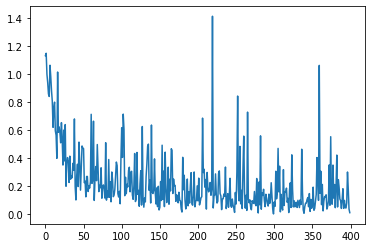

In [21]:
plt.plot(running_loss_list)


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on train images: ', correct/total)

Accuracy of the network on train images:  0.9481865284974094


In [23]:
#saving model

# model.save_state_dict('mytraining.pt')
torch.save(model.state_dict(),'/content/drive/My Drive/Colab Notebooks/Bear_Prediction/bear_pred_model.pt')

In [25]:
#loading the model

model = torch.load('/content/drive/My Drive/Colab Notebooks/Bear_Prediction/bear_pred_model.pt')
